In [363]:
from larch.io import read_ascii, merge_groups
from larch.xafs import autobk, rebin_xafs, xftf

import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

import os

In [318]:
""" Organising file paths. """
fdir1 = r"D:\UCL PhD\Projects\PtNi Single Atom Alloy\Photon Factory\01_Sample3-1_1\hold_potential"
fdir2 = r"D:\UCL PhD\Projects\PtNi Single Atom Alloy\Photon Factory\04_Sample3-1_2\hold_potential"
fdir3 = r"D:\UCL PhD\Projects\PtNi Single Atom Alloy\Photon Factory\05_Sample3-1_2\hold_potential"
fdirs = [fdir1, fdir2, fdir3]
fnames = [[fname for fname in os.listdir(fdir)] for fdir in fdirs]
fpaths = [[os.path.join(fd, fn) for fn in fns] for fns, fd in zip(fnames, fdirs)]


In [394]:
def read_pf_data(fpath, name=None):
    """ help function to read photon factory data. """
    data = read_ascii(fpath)
    
    #labels="angle(c) angle(o) time i0 i1 i2 sca1 sca2 sca3 sca4 sca5 sca6 sca7 icr1 icr2 icr3 icr4 icr5 icr6 icr7"
    # d_spacing = 3.13548574 # Athena Value
    d_spacing = 3.13551
    hbarc = 1973.27053324

    data.mu = (data.col7 + data.col8 + data.col9 + data.col10 + data.col11 + data.col12 + data.col13) / data.col4
    data.energy = 2 * np.pi * hbarc / (2 * d_spacing * np.sin(np.radians(data.angle_read)))
    if name is not None:
        data.__name__ = name
   
    return data

def read_pf_trans(fpath, name=None):
    """ helper function to read photon factory transmission data. """
    data = read_ascii(fpath)
    d_spacing = 3.13551
    hbarc = 1973.27053324
    
    data.mu = np.log(data.col4 / data.col5)
    data.energy = 2 * np.pi * hbarc / (2 * d_spacing * np.sin(np.radians(data.angle_read)))
    if name is not None:
        data.__name__ = name
        
    return data

In [320]:
""" Loading via Larch and organising into hold potential groups. """
datas = [[read_pf_data(fp, fn) for fp, fn in zip(fpath, fname)] for fpath, fname in zip(fpaths, fnames)]
data_group1 = {"f0.4": datas[0][:14],
               "f0.9": datas[0][14:28],
               "f1.4": datas[0][30:46],
               "b0.9": datas[0][46:60],
               "b0.4": datas[0][60:]}
data_group2 = {"f0.7": datas[1][:10],
               "f1.05": datas[1][10:19],
               "f1.2": datas[1][19:28],
               "f1.4": datas[1][28:38],
               "b1.2": datas[1][38:48],
               "b0.9": datas[1][48:57],
               "b0.7": datas[1][57:]}
# data_group3 = {""}

(8300.0, 8400.0)

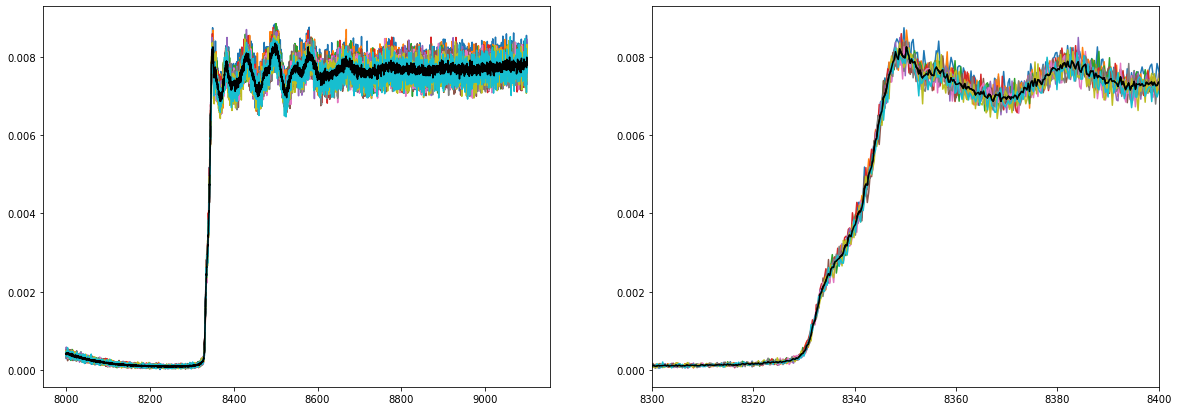

In [334]:
""" Inspecting Raw Data. """
key = "b1.2"
merged_test = merge_groups(datas[2][0:10])

fig, ax = plt.subplots(1, 2, figsize=(20, 7))
for data in datas[2][0:10]:
    ax[0].plot(data.energy, data.mu)
    ax[0].plot(merged_test.energy, merged_test.mu, color="k")
    ax[1].plot(data.energy, data.mu)
    ax[1].plot(merged_test.energy, merged_test.mu, color="k")
    
# ax[1].set_xlim(11550, 11600)
ax[1].set_xlim(8300, 8400)

In [273]:
for data in data_group["f0.9"]:
    print(data.__name__)

No3-1_hold_potential_14.qd
No3-1_hold_potential_15.qd
No3-1_hold_potential_16.qd
No3-1_hold_potential_17.qd
No3-1_hold_potential_18.qd
No3-1_hold_potential_19.qd
No3-1_hold_potential_20.qd
No3-1_hold_potential_21.qd
No3-1_hold_potential_22.qd
No3-1_hold_potential_23.qd
No3-1_hold_potential_24.qd
No3-1_hold_potential_25.qd
No3-1_hold_potential_26.qd
No3-1_hold_potential_27.qd


In [302]:
for data in data_group2:
    print(data)

f0.7
f1.05
f1.2
f1.4
b1.2
b0.9
b0.7


(1.0, 1.4)

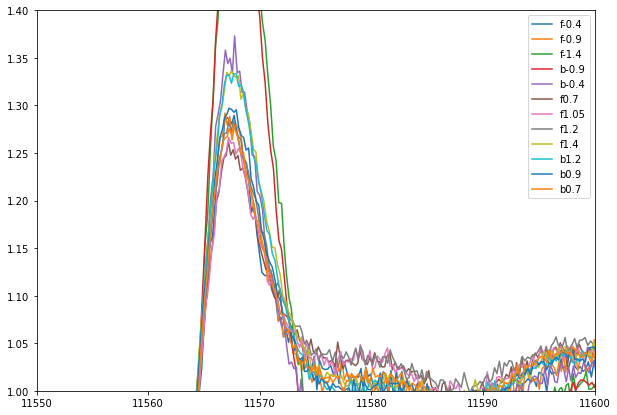

In [367]:
f04 = merge_groups(data_group1["f0.4"][1:])
f09 = merge_groups(data_group1["f0.9"])
f14 = merge_groups(data_group1["f1.4"][2:])
b09 = merge_groups(data_group1["b0.9"])
b04 = merge_groups(data_group1["b0.4"][:-1])

merged_group2 = [merge_groups(data_group2[key]) for key in data_group2]
merged_names2 = list(data_group2.keys())

merged_group1 = [f04, f09, f14, b09, b04]
merged_names1 = ["f-0.4", "f-0.9", "f-1.4", "b-0.9", "b-0.4"]


fig = plt.figure(figsize=(10, 7))
for data, name in zip(merged_group1[:], merged_names1):
    data.__name__ = name
    autobk(data)
    plt.plot(data.energy, data.norm, label=data.__name__)

for data, name in zip(merged_group2[:], merged_names2):
    data.__name__ = name
    autobk(data)
    plt.plot(data.energy, data.norm, label=data.__name__)

plt.legend()
plt.xlim(11550, 11600)
plt.ylim(1, 1.4)

In [384]:
fig = px.line()
for data in merged_group1[:]:
    fig.add_scatter(x=data.energy, y=data.norm, mode="lines", name="1: " + data.__name__)
for data in merged_group2[:]:
    fig.add_scatter(x=data.energy, y=data.norm, mode="lines", name="2: " + data.__name__)
    
fig.update_xaxes(title_text="Energy (eV)")
fig.update_yaxes(title_text="Normalised Absorption")
fig.show()

In [366]:
merged_group1

[<Group f-0.4>,
 <Group f-0.9>,
 <Group 0x2304c991c70>,
 <Group 0x2304cf53b50>,
 <Group 0x2304cba7790>]

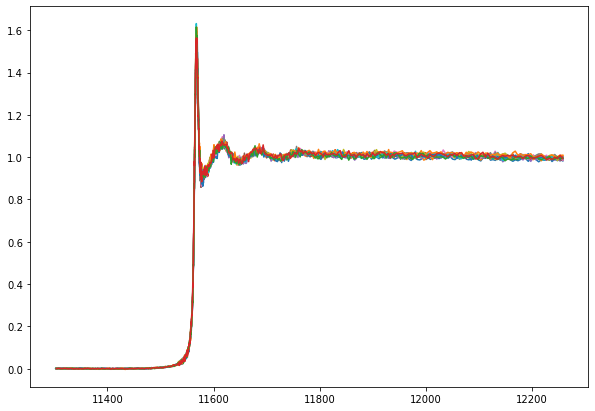

In [239]:
fig = plt.figure(figsize=(10, 7))
for data in data_group["b0.9"]:
    autobk(data, kmin=3.000, kmax=13.000, kweight=2)
    rebin_xafs(data)
    autobk(data.rebinned, kmin=3.000, kmax=13.000, kweight=2)
    plt.plot(data.rebinned.energy, data.rebinned.norm)
    
# plt.xlim(11560, 11580)

Text(0.5, 0, 'k ($\\AA$)')

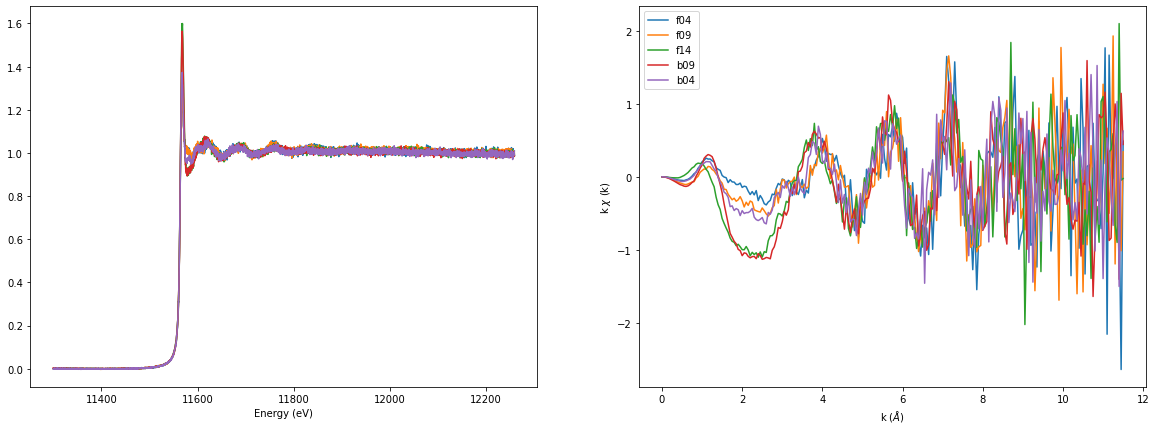

In [189]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7))
for data in datas_merged[:]:
    autobk(data, kmin=3.000, kmax=11.500, kweight=2)
    ax[0].plot(data.energy, data.norm, label=data.__name__)
    ax[1].plot(data.k, data.chi * data.k ** 2, label=data.__name__)
plt.legend()
# dgroup.chi * dgroup.k ** kweight
# ax[1].set_xlim(3, 14)
# ax[1].set_ylim(-0.1, 0.1)




ax[0].set_xlabel("Energy (eV)")
ax[1].set_ylabel("k $\chi$ (k)")
ax[1].set_xlabel("k ($\AA$)")
# plt.xlim(11550, 11600)

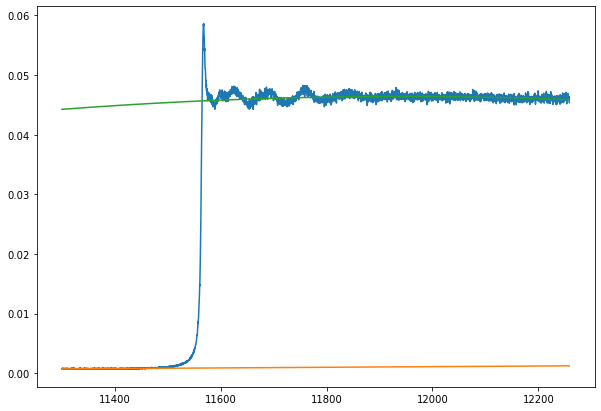

In [190]:
fig = plt.figure(figsize=(10, 7))
data = datas_merged[0]

plt.plot(data.energy, data.mu, label="Absorption")
plt.plot(data.energy, data.pre_edge, label="Pre-edge line")
plt.plot(data.energy, data.post_edge, label="Post-edge line")
# plt.plot(data.energy, data.norm, label="Normalised")

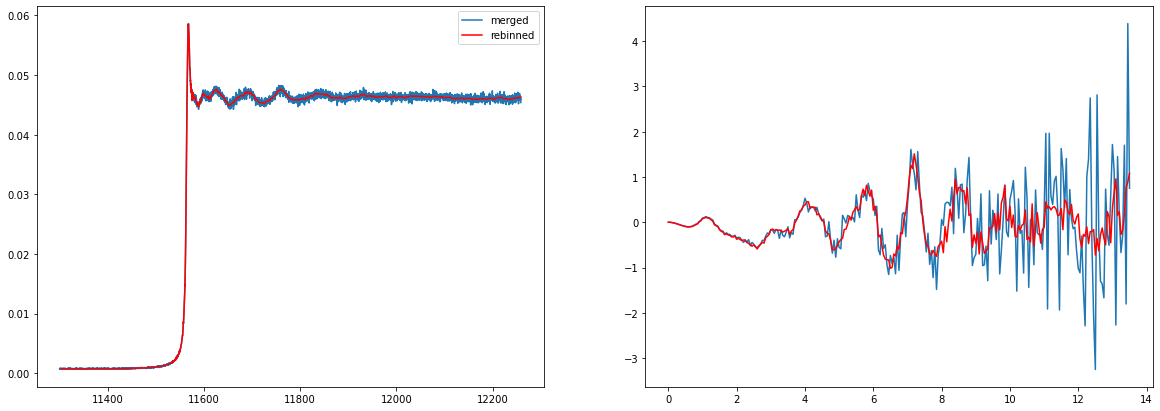

In [215]:
data = datas_merged[0]
rebin_xafs(data)
rebinned = data.rebinned
autobk(data, kmin=3.000, kmax=15.000, kweight=2)
autobk(rebinned, kmin=3.000, kmax=15.000, kweight=2)

fig, ax = plt.subplots(1, 2, figsize=(20, 7))
ax[0].plot(data.energy, data.mu, label="merged")
ax[0].plot(rebinned.energy, rebinned.mu, label="rebinned", color="r")
ax[0].legend()

ax[1].plot(data.k, data.chi * data.k ** 2, label="merged")
ax[1].plot(rebinned.k, rebinned.chi * rebinned.k ** 2, label="rebinned", color="r")
ax[0].legend()

(11550.0, 11600.0)

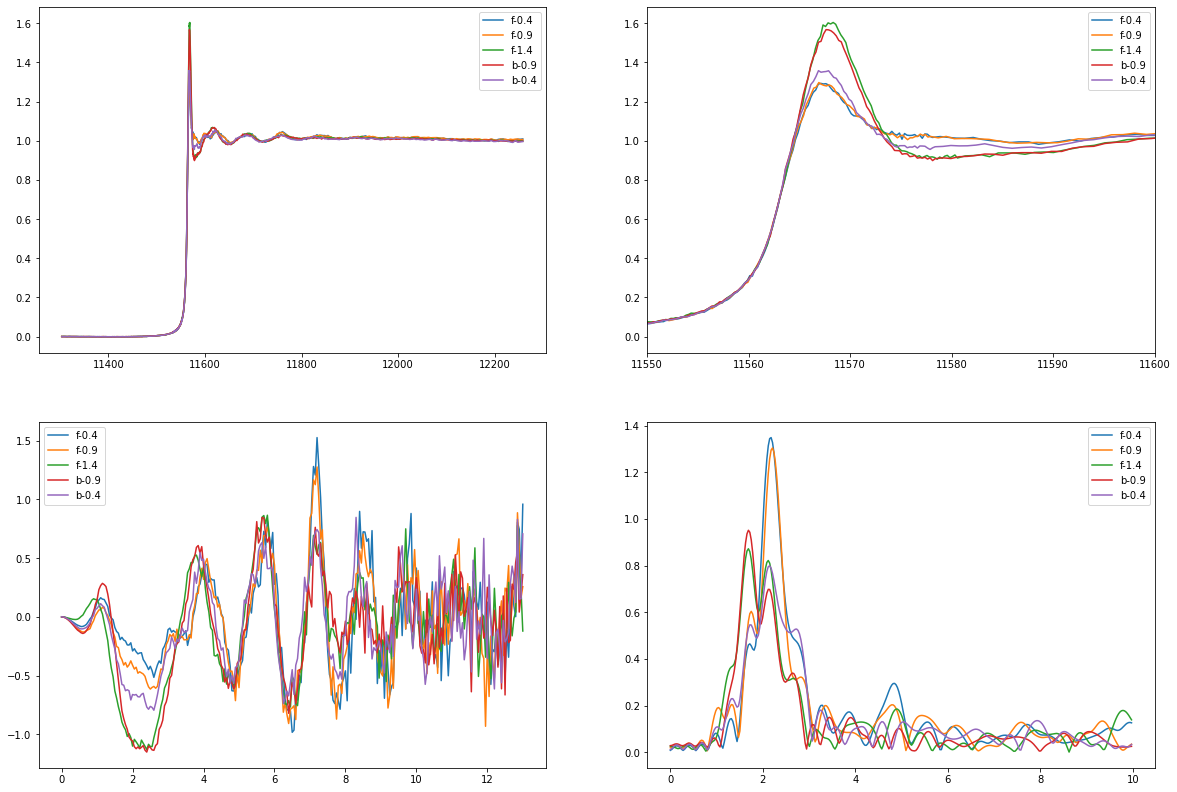

In [245]:
fig, ax = plt.subplots(2, 2, figsize=(20, 14))

for data in datas_merged[:]:
    autobk(data, kmin=3.000, kmax=13.000, kweight=2)
    rebin_xafs(data)
    autobk(data.rebinned, kmin=3.000, kmax=13.000, kweight=2)
    xftf(data.rebinned, kmin=3.0, kmax=13, dk=1.0, window="hanning", kweight=2.00)
    
    ax[0, 0].plot(data.rebinned.energy, data.rebinned.norm, label=data.__name__)
    ax[1, 0].plot(data.rebinned.k, data.rebinned.chi * data.rebinned.k ** 2, label=data.__name__)
    ax[0, 1].plot(data.rebinned.energy, data.rebinned.norm, label=data.__name__)
    ax[1, 1].plot(data.rebinned.r, data.rebinned.chir_mag, label=data.__name__)
    
for i in range(2):
    for j in range(2):
        ax[i, j].legend()
ax[0, 1].set_xlim(11550, 11600)

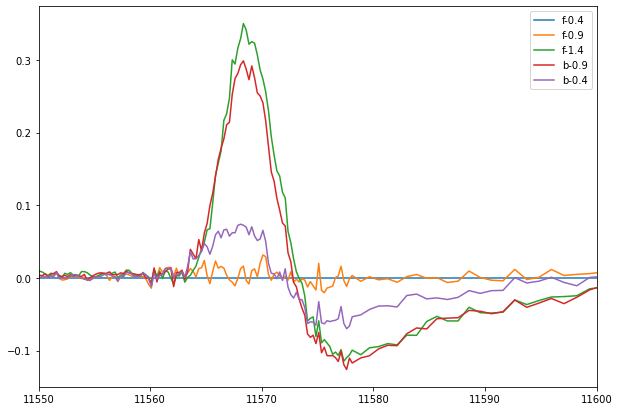

In [256]:
""" Delta mu """
fig = plt.figure(figsize=(10, 7))
for data in datas_merged:
    norm = np.interp(datas_merged[0].rebinned.energy, data.rebinned.energy, data.rebinned.norm)
    plt.plot(datas_merged[0].rebinned.energy, norm - datas_merged[0].rebinned.norm, label=data.__name__)
    
plt.xlim(11550, 11600)
plt.legend()

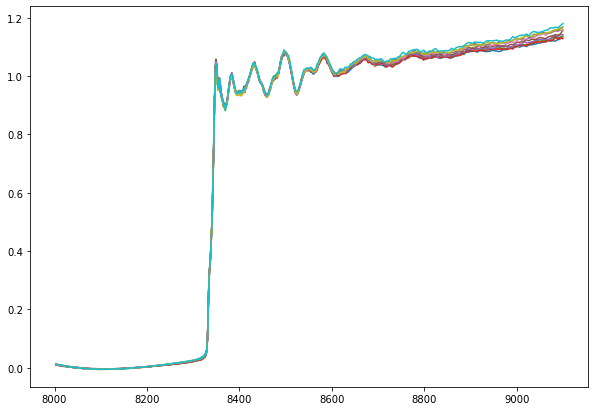

In [355]:
""" Ni K Edge """
data_group3 = [datas[2][i:i+10] for i in range(0, 100, 10)]
merged_group3 = [merge_groups(data_group) for data_group in data_group3]

fig = plt.figure(figsize=(10, 7))
for i, data in enumerate(merged_group3[:]):
    autobk(data)
    rebin_xafs(data)
    autobk(data.rebinned)
    plt.plot(data.rebinned.energy, data.rebinned.norm)

# plt.xlim(8300, 8500)

In [357]:
fig = plt.figure(figsize=(10, 7))
data = datas_merged3[0]

plt.plot(data.energy, data.mu, label="Absorption")
plt.plot(data.energy, data.pre_edge, label="Pre-edge line")
plt.plot(data.energy, data.post_edge, label="Post-edge line")
# plt.plot(data.energy, data.norm, label="Normalised")

array([8000.04255417, 8000.29439188, 8000.55172124, ..., 9099.13683541,
       9099.45788765, 9099.80036897])

In [407]:
""" Standard Spectra """
fdir = r"D:\UCL PhD\Projects\PtNi Single Atom Alloy\Photon Factory"
fnames = ["Ptfoil_2_0.qd", "PtO2_2_0.qd"]
fpaths = [os.path.join(fdir, fname) for fname in fnames]

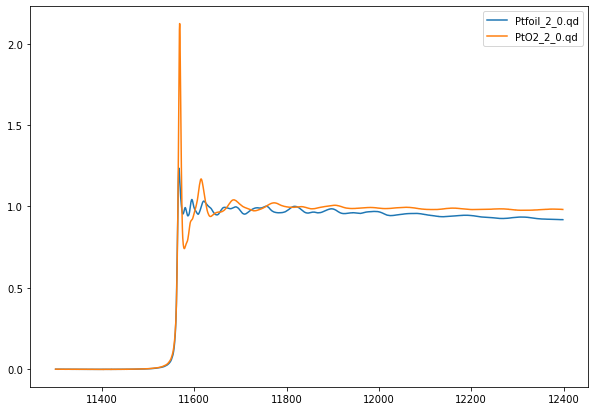

In [408]:
""" Plotting """
standard_datas = [read_pf_trans(fpath, fname) for fpath, fname in zip(fpaths, fnames)]
fig = plt.figure(figsize=(10, 7))
for data in standard_datas:
    autobk(data)
    plt.plot(data.energy, data.norm, label=data.__name__)
plt.legend()

(0.0, 6.0)

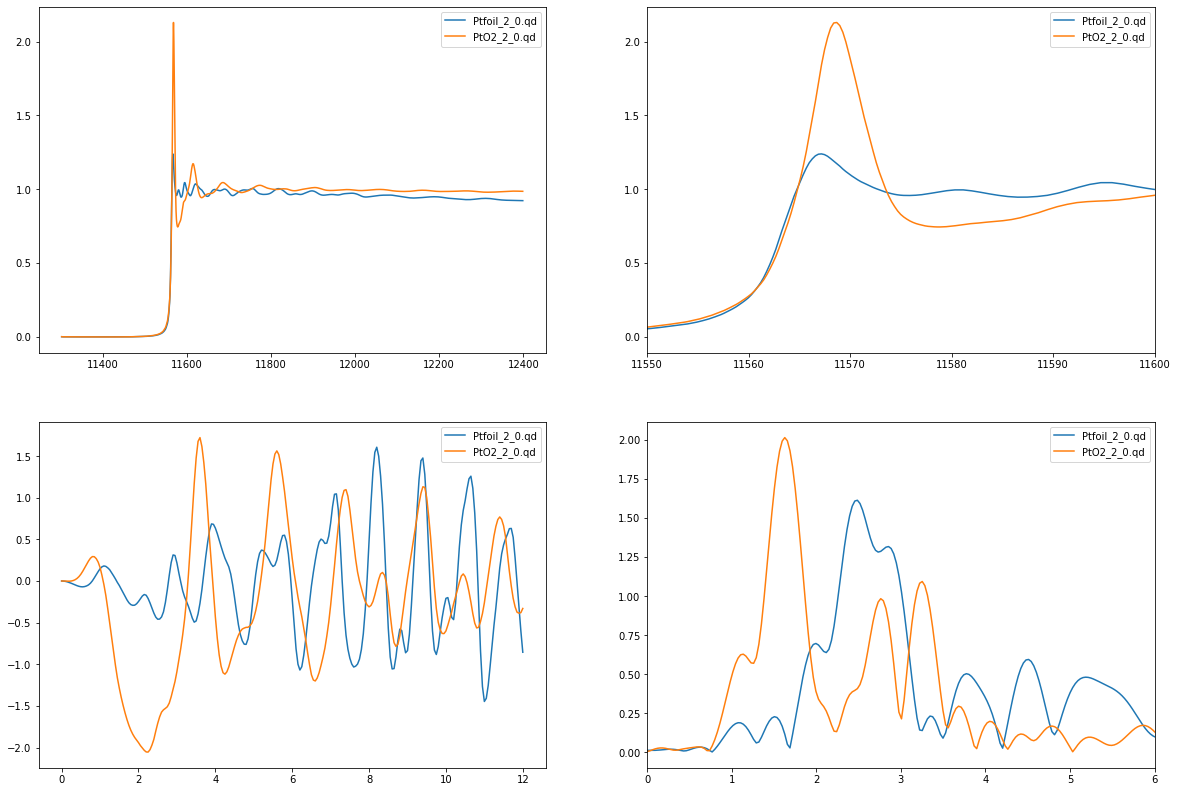

In [454]:
fig, ax = plt.subplots(2, 2, figsize=(20, 14))

for data in standard_datas[:]:
    autobk(data, kmin=3.000, kmax=12.000, kweight=2)
    rebin_xafs(data)
    autobk(data.rebinned, kmin=3.000, kmax=12.000, kweight=2)
    xftf(data.rebinned, kmin=3.0, kmax=12.000, dk=1.0, window="hanning", kweight=2.00)
    
    ax[0, 0].plot(data.rebinned.energy, data.rebinned.norm, label=data.__name__)
    ax[1, 0].plot(data.rebinned.k, data.rebinned.chi * data.rebinned.k ** 2, label=data.__name__)
    ax[0, 1].plot(data.rebinned.energy, data.rebinned.norm, label=data.__name__)
    ax[1, 1].plot(data.rebinned.r, data.rebinned.chir_mag, label=data.__name__)
    
for i in range(2):
    for j in range(2):
        ax[i, j].legend()
ax[0, 1].set_xlim(11550, 11600)
ax[1, 1].set_xlim(0, 6)

In [414]:
from tools import get_feff_info as finfo

feff_folder = r"data/feffs/Pt1_L2_Platinum_cif1011103"
info = finfo.get_path_info(feff_folder)
info

files.dat found, returning dataframe.


file  sig2  amp ratio   deg  nlegs  r effective
0   feff0001.dat   0.0    100.000  12.0      2       2.7888
1   feff0002.dat   0.0     24.070   6.0      2       3.9440
2   feff0003.dat   0.0     12.940  48.0      3       4.1832
3   feff0004.dat   0.0      5.032  48.0      3       4.7608
4   feff0005.dat   0.0     56.360  24.0      2       4.8304
5   feff0006.dat   0.0      8.730  48.0      3       5.2040
6   feff0007.dat   0.0     27.250  96.0      3       5.2040
7   feff0008.dat   0.0     18.510  12.0      2       5.5777
8   feff0009.dat   0.0      7.423  12.0      3       5.5777
9   feff0010.dat   0.0     81.370  24.0      3       5.5777
10  feff0011.dat   0.0     13.840  12.0      4       5.5777
11  feff0012.dat   0.0      3.050  12.0      4       5.5777
12  feff0013.dat   0.0      3.924  48.0      4       5.5777
13  feff0014.dat   0.0     92.870  12.0      4       5.5777
14  feff0015.dat   0.0      8.117  48.0      4       5.5777
15  feff0017.dat   0.0     26.170  24.0      2       6.2360
16  feff0018.dat   0.0      3.632  48.0      3       6.4844
17  feff0019.dat   0.0      7.974  48.0      3       6.4844
18  feff0020.dat   0.0      9.550  48.0      3       6.4844
19  feff0021.dat   0.0      3.526  96.0      3       6.5984
20  feff0022.dat   0.0      8.019  96.0      4       6.5984
21  feff0023.dat   0.0      4.773  96.0      4       6.5984
22  feff0026.dat   0.0      6.486   8.0      2       6.8312

In [457]:
from larch.xafs import feffit_transform, feffpath, feffit_dataset, feffit
from larch.fitting import param_group, param
from iteration_utilities import deepflatten

_feffit_trans = feffit_transform(kmin=3.000, kmax=12.000, dk=1.0000, kw=2,
                                 window="hanning", fitspace='r', rmin=1.000, rmax=6.000)


# Create feffit Parameter Group to hold fit parameters (Core parameters)
_feffit_params = param_group(s02=param(1.0, min=0, vary=True),
                             e0=param(0.1, min=-25, max=25, vary=True))

# Create feffit Parameter Group to hold fit parameters (Repeating parameters)
# The paths information from "info" is referred
scatter_paths = [os.path.join(feff_folder, fname) for fname in info["file"].values[:15]]
ncucu = info["deg"].values
path_num = len(scatter_paths)

fit_params = ["n_ptpt", "delr_pt", "sigma2_ptpt"]
def fit_constraints(n):
    constraints = [param(n, vary=False),
                   param(0.001, min=-0.5, max=0.5, vary=True),
                   param(0.008, min=0.001, max=0.009, vary=True)]
    
    return constraints

def flatten_list(_list):
    return np.array(_list).ravel().tolist()

all_fit_params = [param + str(i) for i in range(path_num) for param in fit_params]
all_fit_cons = list(deepflatten([fit_constraints(n) for i, n in zip(range(path_num), ncucu)]))

# Put organised fit parameters and constraints into feffit parameter group
for key, value in zip(all_fit_params, all_fit_cons):
    setattr(_feffit_params, key, value)

_paths_dict = {}

def generate_feffpath(file_path, label, degen, e0, sigma2, s02, deltar):
    return feffpath(file_path, label=label, degen=degen, e0=e0, sigma2=sigma2, s02=s02, deltar=deltar)
    
for i, scatter_path in enumerate(scatter_paths):
    _paths_dict["Pt" + str(i)] = generate_feffpath(scatter_path,
                                                   label="Pt"+str(i),
                                                   degen=1,
                                                   e0="e0",
                                                   sigma2="sigma2_ptpt"+str(i),
                                                   s02="s02 * n_ptpt"+str(i),
                                                   deltar="delr_pt"+str(i))
    
_feffit_dataset = feffit_dataset(data=standard_datas[0], transform=_feffit_trans, paths=_paths_dict)
_feffit_result = feffit(_feffit_params, _feffit_dataset)                       

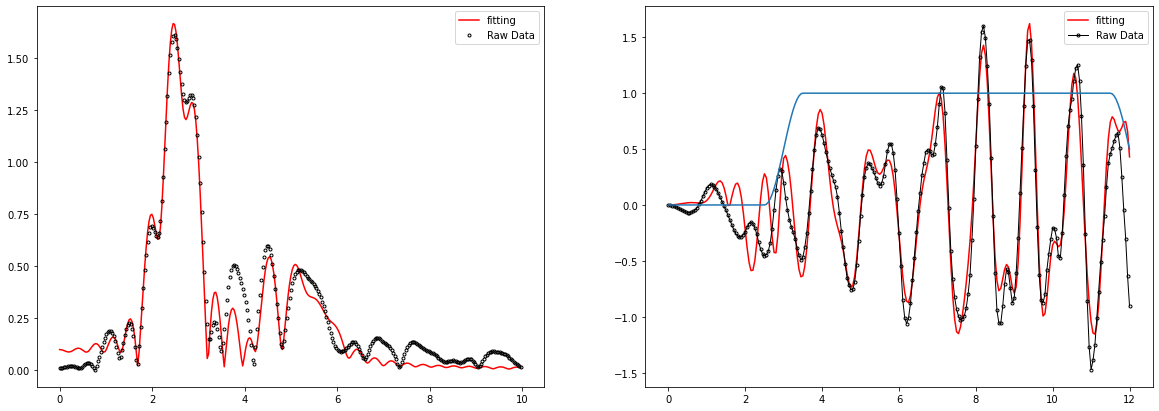

In [458]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7))

spectra = _feffit_result.datasets[0].data
fit = _feffit_result.datasets[0].model

ax[0].plot(fit.r, fit.chir_mag, color="r", label="fitting")
ax[0].plot(spectra.r, spectra.chir_mag, lw=0, marker='o', markersize=3, fillstyle='none', color="k", label="Raw Data")
ax[0].legend()

ax[1].plot(fit.k, fit.chi * fit.k ** 2, color="r", label="fitting")
ax[1].plot(spectra.k, spectra.chi * spectra.k ** 2, lw=1, marker='o', markersize=3, fillstyle='none', color="k", label="Raw Data")
ax[1].plot(fit.k, fit.kwin)
ax[1].legend()

In [403]:
""" Ex situ Spectra """
fdir = r"D:\UCL PhD\Projects\PtNi Single Atom Alloy\Photon Factory"
fnames = ["No9-2_PtNi25-750_0.qd", "No11-1_PtNi50-750_3_0.qd"]
fpaths = [os.path.join(fdir, fname) for fname in fnames]

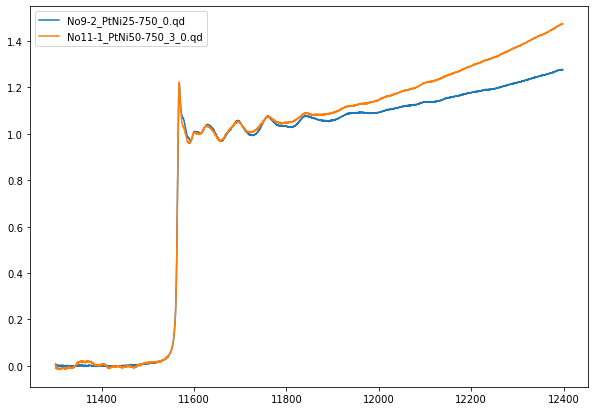

In [404]:
""" Plotting """
standard_datas = [read_pf_trans(fpath, fname) for fpath, fname in zip(fpaths, fnames)]
fig = plt.figure(figsize=(10, 7))
for data in standard_datas:
    autobk(data)
    plt.plot(data.energy, data.norm, label=data.__name__)
plt.legend()

(11550.0, 11600.0)

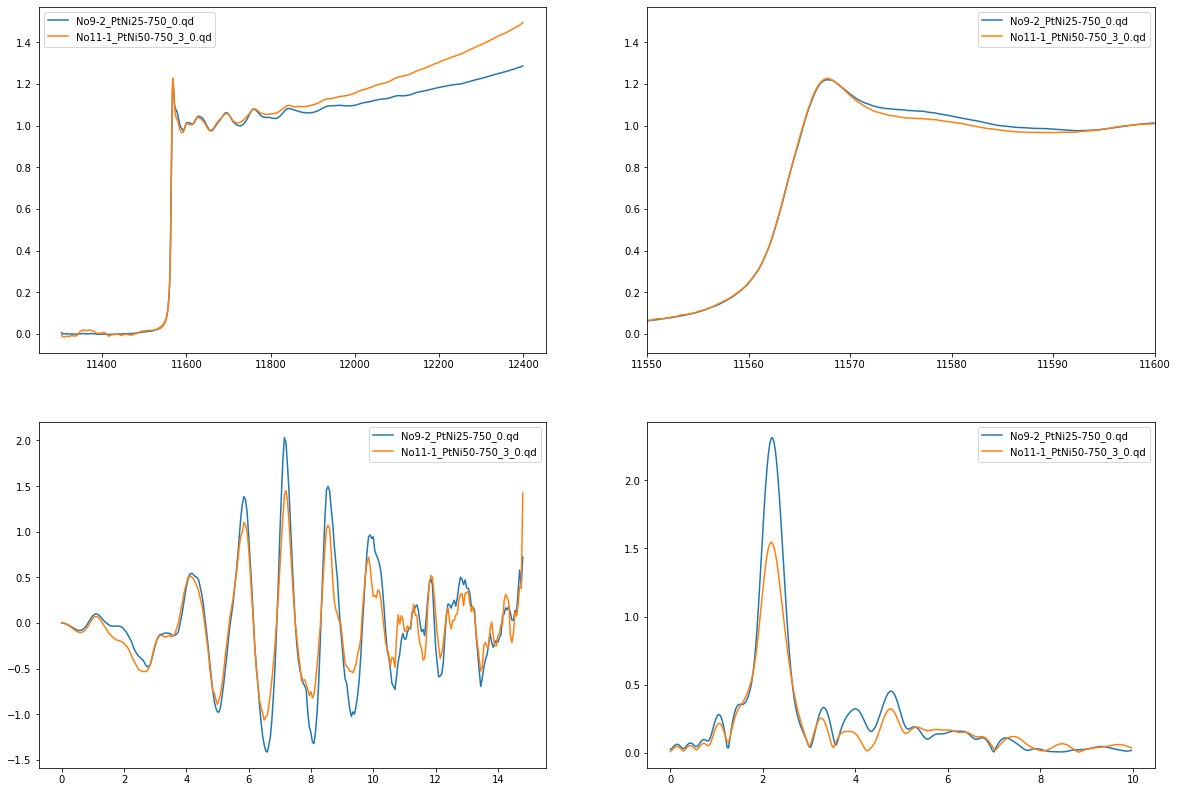

In [405]:
fig, ax = plt.subplots(2, 2, figsize=(20, 14))

for data in standard_datas[:]:
    autobk(data, kmin=3.000, kmax=13.000, kweight=2)
    rebin_xafs(data)
    autobk(data.rebinned, kmin=3.000, kmax=25.000, kweight=2)
    xftf(data.rebinned, kmin=3.0, kmax=13, dk=1.0, window="hanning", kweight=2.00)
    
    ax[0, 0].plot(data.rebinned.energy, data.rebinned.norm, label=data.__name__)
    ax[1, 0].plot(data.rebinned.k, data.rebinned.chi * data.rebinned.k ** 2, label=data.__name__)
    ax[0, 1].plot(data.rebinned.energy, data.rebinned.norm, label=data.__name__)
    ax[1, 1].plot(data.rebinned.r, data.rebinned.chir_mag, label=data.__name__)
    
for i in range(2):
    for j in range(2):
        ax[i, j].legend()
ax[0, 1].set_xlim(11550, 11600)